In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
#from livelossplot.keras import PlotLossesCallback
#import efficientnet.keras as efn
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras import models
from keras import layers
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy
import tensorflow as tf
from keras.models import Model
from keras.applications import MobileNetV2, ResNet50, InceptionV3 # try to use them and see which is better
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.utils import get_file
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import numpy as np




Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
#from livelossplot.keras import PlotLossesCallback
#import efficientnet.keras as efn
#from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
#from keras import backend as K
#from tensorflow.keras import backend as K

#import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend
from sklearn.model_selection import train_test_split

import pandas as pd 

#from tensorflow.python.estimator.keras import Layer
from tensorflow.keras.layers import Embedding, Dense, Input, Dropout, LSTM, Activation, Conv2D, Reshape, Average, Bidirectional

from tensorflow.keras import layers

from tensorflow.keras.models import Sequential, load_model


from tensorflow.keras import backend as K

#from sklearn.metrics import confusion_matrix
from sklearn import metrics

#from tensorflow.keras.models import models

#from tensorflow. keras.utils import plot_mode

In [3]:
import keras
keras.__version__

'2.3.1'

In [7]:
from keras.applications import VGG16
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3

conv_base = InceptionV3(weights='imagenet',#,
                    include_top=False,#, bese true
                  input_shape=(150, 150, 3))
    
                       #)
                  

conv_base.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [8]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir1 = 'D:\\MARIJA na FEIT\\Diplomska\\Diatoms'
entire_data = os.path.join(base_dir1)

In [9]:
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras import models
from keras import layers
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy
import tensorflow as tf
from keras.models import Model
from keras.applications import MobileNetV2, ResNet50, InceptionV3 # try to use them and see which is better
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.utils import get_file
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import numpy as np




In [10]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,3,3,2048))#1000)) #8, 8, 2048)) #3,3
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

X, Y = extract_features(entire_data, 1100)

Found 1100 images belonging to 55 classes.


In [11]:
print(X.shape)

(1100, 3, 3, 2048)


In [12]:
print(X.shape)
print(Y.shape)


(1100, 3, 3, 2048)
(1100,)


In [13]:
#enkodiranje na outputite
# import keras.utils as np_utils
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y)
print(Y.shape)


(1100, 55)


In [14]:
X = np.reshape(X, (X.shape[0],3*3* 2048))#1000)) #8 * 8 * 2048))
print(X.shape)

(1100, 18432)


In [15]:
#dodadeno
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv2d_188':
        set_trainable = True
    if layer.name == 'conv2d_180':
        set_trainable = True
    if layer.name == 'conv2d_187':
        set_trainable = True
    if layer.name == 'conv2d_186':
        set_trainable = True
    if layer.name == 'conv2d_183':
        set_trainable = True
    if layer.name == 'conv2d_182':
        set_trainable = True
    if layer.name == 'conv2d_283':
        set_trainable = True
    if layer.name == 'conv2d_284':
        set_trainable = True
    if layer.name == 'conv2d_285':
        set_trainable = True
    if layer.name == 'conv2d_286':
        set_trainable = True
    if layer.name == 'conv2d_287':
        set_trainable = True
    if layer.name == 'conv2d_291':
        set_trainable = True
    if layer.name == 'conv2d_289':
        set_trainable = True
    if layer.name == 'conv2d_292':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [22]:


from keras import models
from keras import layers
from keras import optimizers


model = models.Sequential()
#model.add(layers.Flatten()) #dodadeno
model.add(layers.Dense(256, activation='relu', input_dim=3 * 3 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(55, activation='softmax'))
#model.add(layers.Dense(55, activation='softmax'))


model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['acc']) #bese accuracy


In [23]:


# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    # plt.figure()
    # plt.plot(epochs, loss, 'r.')
    # plt.plot(epochs, val_loss, 'r-')
    # plt.title('Training and validation loss')
    plt.show()

    plt.savefig('acc_vs_epochs.png')

In [24]:
# evaluate a model using k-fold cross-validation
from sklearn.model_selection import KFold

from sklearn import metrics
def evaluate_model(model,all_features, all_labels, n_folds=10):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    #print(all_features.shape)
    for train_ix, test_ix in kfold.split(all_features):
    # select rows for train and test
        trainX, trainY, testX, testY = all_features[train_ix], all_labels[train_ix],all_features[test_ix], all_labels[test_ix]
        # fit model
        print(trainX.shape)
        print(testX.shape)
        #testX = np.testX.reshape(testX, (testX.shape[0],8, 8, 2048))
        history = model.fit(trainX, trainY, epochs=100, batch_size=10, validation_data=(testX, testY), verbose=0) #bese 100 epohi
        plot_training(history)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        predictions = model.predict(testX)
        cm = metrics.confusion_matrix(np.argmax(testY, axis=1),np.argmax(predictions, axis=1))
        print(cm)

        print(metrics.classification_report(np.argmax(testY, axis=1),np.argmax(predictions, axis=1)))
        print(metrics.f1_score(np.argmax(testY, axis=1),np.argmax(predictions, axis=1), average='weighted'))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

(990, 18432)
(110, 18432)


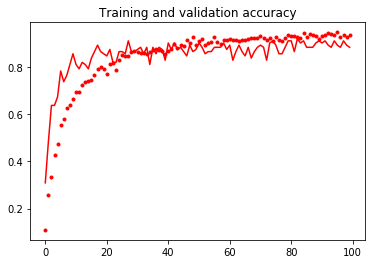

> 88.182
[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       1.00      0.67      0.80         6
      

C:\Users\MARIJA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(990, 18432)
(110, 18432)


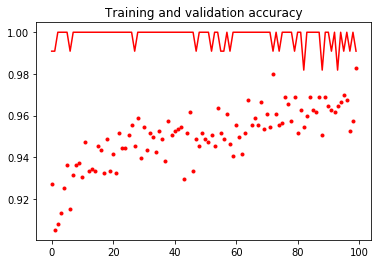

> 99.091
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         3
      

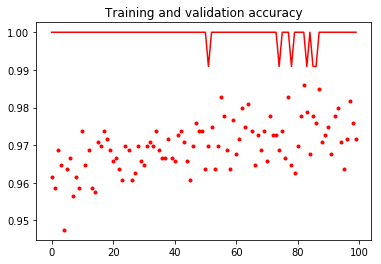

> 100.000
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
     

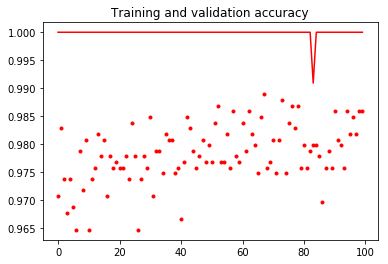

> 100.000
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         6
     

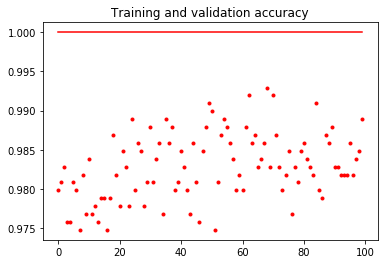

> 100.000
[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
     

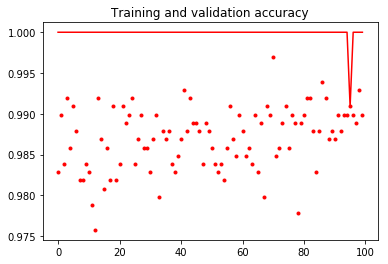

> 100.000
[[5 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         5
          17       1.00      1.00      1.00         1
     

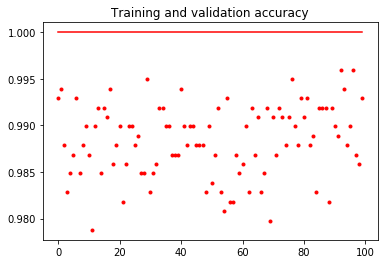

> 100.000
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
     

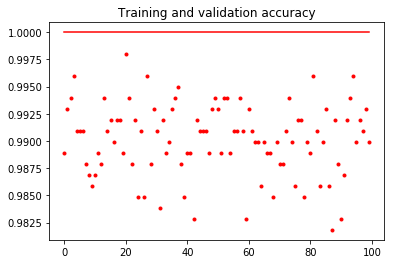

> 100.000
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
     

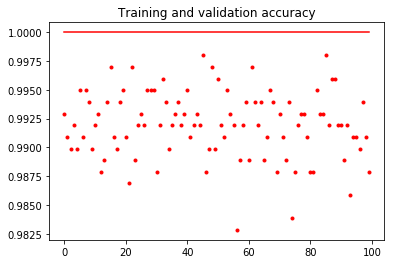

> 100.000
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
     

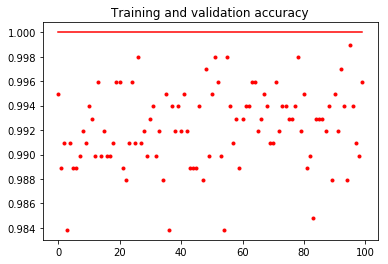

> 100.000
[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         1
     

<Figure size 432x288 with 0 Axes>

In [25]:

scores, histories = evaluate_model(model, X,Y)